<a href="https://colab.research.google.com/github/Jundo22l/Jundo22l/blob/main/IOU%2Bmiou_pytorchver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def compute_iou(box1, box2):
    """
    두 바운딩 박스 간의 Intersection over Union (IoU)을 계산합니다.
    """
    # 교차 영역의 좌표 계산
    x1 = torch.max(box1[0], box2[0])
    y1 = torch.max(box1[1], box2[1])
    x2 = torch.min(box1[2], box2[2])
    y2 = torch.min(box1[3], box2[3])

    # 교차 영역의 면적 계산
    inter_area = torch.clamp(x2 - x1, min=0) * torch.clamp(y2 - y1, min=0)

    # 각 박스의 면적 계산
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # IoU 계산
    iou = inter_area / (box1_area + box2_area - inter_area)

    return iou, (x1, y1, x2, y2)

def plot_single_iou(box1, box2):
    """
    두 개의 바운딩 박스와 그 IoU를 시각화합니다.
    """
    iou, inter_box = compute_iou(box1, box2)

    fig, ax = plt.subplots(figsize=(8, 8))

    # 예측 박스 그리기 (실선)
    rect_pred = patches.Rectangle((box1[0], box1[1]), box1[2]-box1[0], box1[3]-box1[1],
                                  linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect_pred)

    # 타겟 박스 그리기 (점선)
    rect_target = patches.Rectangle((box2[0], box2[1]), box2[2]-box2[0], box2[3]-box2[1],
                                    linewidth=2, edgecolor='b', facecolor='none', linestyle='--')
    ax.add_patch(rect_target)

    # 교차 영역 그리기 (초록색 점선)
    if inter_box[2] > inter_box[0] and inter_box[3] > inter_box[1]:
        inter_rect = patches.Rectangle(inter_box[:2], inter_box[2]-inter_box[0], inter_box[3]-inter_box[1],
                                       linewidth=1, edgecolor='g', facecolor='none', linestyle=':')
        ax.add_patch(inter_rect)

    # IoU 값 표시
    ax.text(0.5, 1.05, f'IoU: {iou:.4f}', ha='center', va='center', transform=ax.transAxes)

    ax.set_title('Single IoU Visualization')

    # 축 범위 설정
    all_coords = torch.cat((box1.unsqueeze(0), box2.unsqueeze(0)))
    ax.set_xlim(all_coords[:, [0,2]].min().item() - 1, all_coords[:, [0,2]].max().item() + 1)
    ax.set_ylim(all_coords[:, [1,3]].min().item() - 1, all_coords[:, [1,3]].max().item() + 1)

    ax.set_aspect('equal')
    plt.show()

def plot_boxes(pred_boxes, target_boxes):
    """
    여러 쌍의 바운딩 박스와 IoU를 시각화합니다.
    """
    assert len(pred_boxes) == len(target_boxes), "Predicted and target box counts must match"

    fig, ax = plt.subplots(figsize=(10, 10))
    colors = plt.cm.rainbow(torch.linspace(0, 1, len(pred_boxes)))

    ious = []

    for i, (pred, target) in enumerate(zip(pred_boxes, target_boxes)):
        iou, inter_box = compute_iou(pred, target)
        ious.append(iou)

        # 예측 박스 그리기 (실선)
        rect_pred = patches.Rectangle((pred[0], pred[1]), pred[2]-pred[0], pred[3]-pred[1],
                                      linewidth=2, edgecolor=colors[i], facecolor='none')
        ax.add_patch(rect_pred)

        # 타겟 박스 그리기 (점선)
        rect_target = patches.Rectangle((target[0], target[1]), target[2]-target[0], target[3]-target[1],
                                        linewidth=2, edgecolor=colors[i], facecolor='none', linestyle='--')
        ax.add_patch(rect_target)

        # 교차 영역 그리기 (초록색 점선)
        if inter_box[2] > inter_box[0] and inter_box[3] > inter_box[1]:
            inter_rect = patches.Rectangle(inter_box[:2], inter_box[2]-inter_box[0], inter_box[3]-inter_box[1],
                                           linewidth=1, edgecolor='g', facecolor='none', linestyle=':')
            ax.add_patch(inter_rect)

        # IoU 값 표시
        center_x = (pred[0] + pred[2]) / 2
        center_y = (pred[1] + pred[3]) / 2
        ax.text(center_x, center_y, f'IoU: {iou:.2f}', ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    mIoU = torch.tensor(ious).mean()
    ax.set_title(f'Bounding Boxes Visualization (mIoU: {mIoU:.4f})')

    # 축 범위 설정
    all_coords = torch.cat((pred_boxes, target_boxes))
    ax.set_xlim(all_coords[:, [0,2]].min().item() - 1, all_coords[:, [0,2]].max().item() + 1)
    ax.set_ylim(all_coords[:, [1,3]].min().item() - 1, all_coords[:, [1,3]].max().item() + 1)

    ax.set_aspect('equal')
    plt.show()

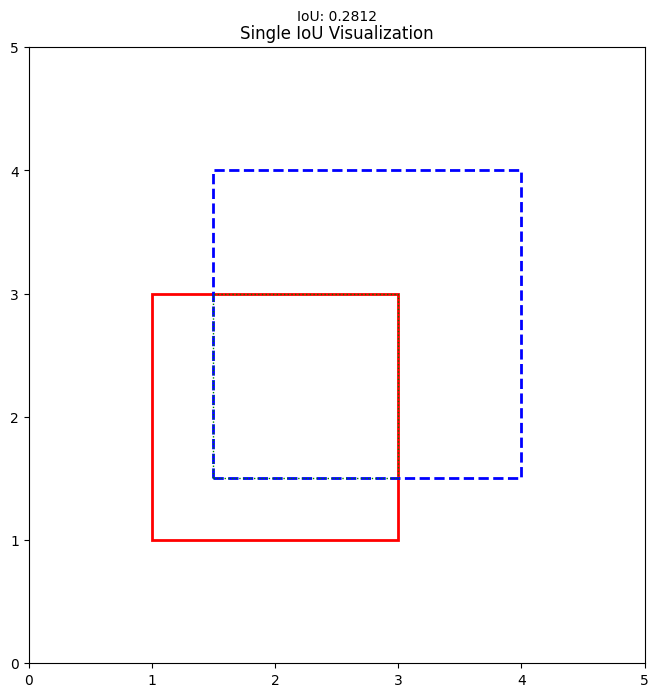

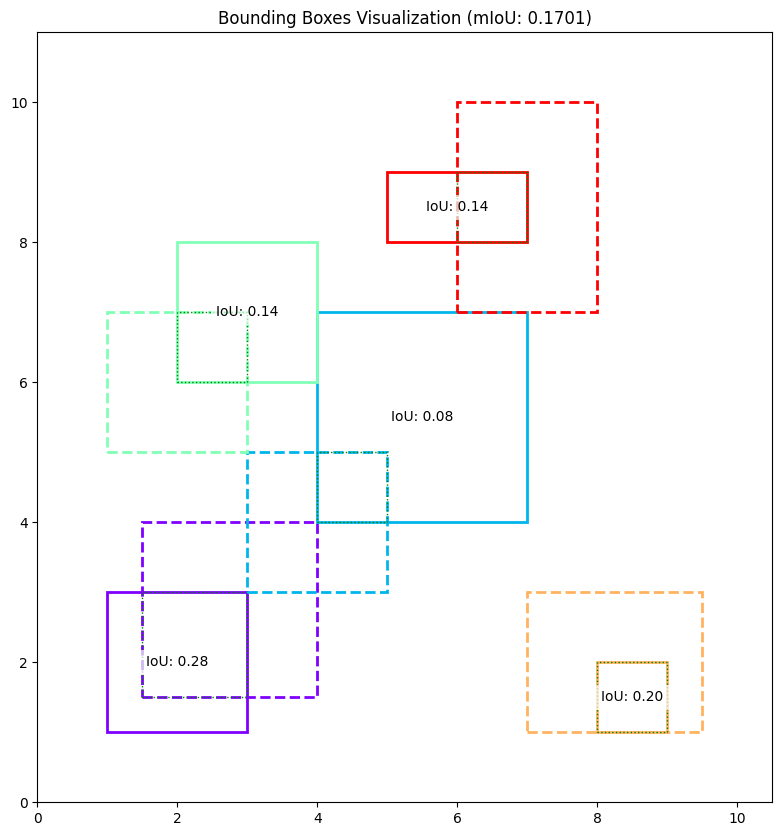

In [18]:
# 사용 예시
pred_boxes = torch.tensor([
    [1, 1, 3, 3],
    [4, 4, 7, 7],
    [2, 6, 4, 8],
    [8, 1, 9, 2],
    [5, 8, 7, 9]
])
target_boxes = torch.tensor([
    [1.5, 1.5, 4, 4],
    [3, 3, 5, 5],
    [1, 5, 3, 7],
    [7, 1, 9.5, 3],
    [6, 7, 8, 10]
])

# 단일 IoU 시각화
plot_single_iou(pred_boxes[0], target_boxes[0])

# mIoU 시각화
plot_boxes(pred_boxes, target_boxes)